In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

## 聚合式教學
#### https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019

## 讀檔案 取顏色編碼欄位

In [2]:
dataset = pd.read_csv('./adidas_data_men_less_category.csv')

x1 = dataset.iloc[:,3].values
x2 = dataset.iloc[:,6].values
x3 = dataset.iloc[:,9].values
# import math
# math.isnan(x3[0])
# type(x3[-1])
# x2[0]

In [3]:
# x = np.array([1,2,3,np.nan])
# np.argwhere(np.isnan(x))

In [4]:
# 處理 主要顏色欄位

rgb_color_list = []
for hex_color1 in x1:
    # 轉10進制
    rgb_color_list.append(list(int(hex_color1[i:i+2], 16) for i in (1, 3, 5)))
rgb_color_list
rgb_mcolor1 = []
rgb_mcolor2 = []
rgb_mcolor3 = []

## 抓RGB的R顏色
for i in range(len(rgb_color_list)):
    rgb_mcolor1.append(rgb_color_list[i][0])
rgb_mcolor1

## 抓RGB的G顏色
for i in range(len(rgb_color_list)):
    rgb_mcolor2.append(rgb_color_list[i][1])
rgb_mcolor2

## 抓RGB的B顏色
for i in range(len(rgb_color_list)):
    rgb_mcolor3.append(rgb_color_list[i][2])
rgb_mcolor3

######################################################################################


# 處理 次要顏色欄位

# rgb_color_list = []

# for hex_color1 in x2:
#     # 轉10進制

#     rgb_color_list.append(list(int(hex_color1[i:i+2], 16) for i in (1, 3, 5)))


# rgb_color_list
# rgb_scolor1 = []
# rgb_scolor2 = []
# rgb_scolor3 = []

# ## 抓RGB的R顏色
# for i in range(len(rgb_color_list)):
#     rgb_scolor1.append(rgb_color_list[i][0])
# rgb_scolor1

# ## 抓RGB的G顏色
# for i in range(len(rgb_color_list)):
#     rgb_scolor2.append(rgb_color_list[i][1])
# rgb_scolor2

# ## 抓RGB的B顏色
# for i in range(len(rgb_color_list)):
#     rgb_scolor3.append(rgb_color_list[i][2])
# rgb_scolor3
    
# rgb_color_list = []

# for i in range(len(x2)):
#     # 轉10進制
#     try:
#         rgb_color_list.append(list(int(x2[i][i:i+2], 16) for i in (1, 3, 5)))
#     except:
#         rgb_color_list.append(list(int(x1[i][i:i+2], 16) for i in (1, 3, 5)))

# rgb_scolor1 = []
# rgb_scolor2 = []
# rgb_scolor3 = []

# ## 抓RGB的R顏色
# for i in range(len(rgb_color_list)):
#     rgb_scolor1.append(rgb_color_list[i][0])
# # rgb_scolor1

# ## 抓RGB的G顏色
# for i in range(len(rgb_color_list)):
#     rgb_scolor2.append(rgb_color_list[i][1])
# # rgb_scolor2

# ## 抓RGB的B顏色
# for i in range(len(rgb_color_list)):
#     rgb_scolor3.append(rgb_color_list[i][2])
# # rgb_scolor3
# rgb_color_list
####################################################################

# 處理 其他顏色欄位

# rgb_color_list = []
# for hex_color1 in x3:
#     # 轉10進制
#     rgb_color_list.append(list(int(hex_color1[i:i+2], 16) for i in (1, 3, 5)))
# rgb_color_list
# rgb_ecolor1 = []
# rgb_ecolor2 = []
# rgb_ecolor3 = []

# ## 抓RGB的R顏色
# for i in range(len(rgb_color_list)):
#     rgb_ecolor1.append(rgb_color_list[i][0])
# rgb_ecolor1

# ## 抓RGB的G顏色
# for i in range(len(rgb_color_list)):
#     rgb_ecolor2.append(rgb_color_list[i][1])
# rgb_ecolor2

# ## 抓RGB的B顏色
# for i in range(len(rgb_color_list)):
#     rgb_ecolor3.append(rgb_color_list[i][2])
# rgb_ecolor3

[55,
 84,
 42,
 38,
 31,
 45,
 235,
 46,
 233,
 35,
 238,
 174,
 28,
 58,
 42,
 45,
 30,
 43,
 24,
 57,
 236,
 189,
 19,
 34,
 235,
 217,
 42,
 178,
 44,
 36,
 46,
 229,
 33,
 196,
 52,
 52,
 75,
 28,
 11,
 32,
 41,
 205,
 200,
 47,
 233,
 75,
 46,
 95,
 238,
 38,
 220,
 243,
 217,
 37,
 53,
 231,
 25,
 221,
 39,
 205,
 47,
 33,
 218,
 159,
 82,
 125,
 35,
 81,
 36,
 61,
 240,
 49,
 184,
 210,
 237,
 238,
 241,
 51,
 48,
 230,
 36,
 234,
 44,
 68,
 35,
 47,
 186,
 119,
 68,
 99,
 71,
 205,
 84,
 232,
 219,
 47,
 218,
 58,
 213,
 188,
 52,
 213,
 59,
 166,
 237,
 209,
 25,
 175,
 35,
 222,
 232,
 226,
 237,
 61,
 75,
 227,
 212,
 50,
 238,
 46,
 40,
 92,
 43,
 53,
 38,
 218,
 45,
 108,
 204,
 90,
 239,
 57,
 227,
 99,
 237,
 60,
 234,
 40,
 222,
 218,
 238,
 235,
 239,
 218,
 230,
 31,
 218,
 189,
 27,
 230,
 232,
 239,
 43,
 68,
 217,
 33,
 181,
 18,
 61,
 228,
 224,
 207,
 240,
 216,
 26,
 48,
 74,
 79,
 29,
 25,
 28,
 84,
 119,
 62,
 65,
 54,
 82,
 38,
 66,
 66,
 101,
 233,
 44,
 45,

## 插入R G B 3個欄位

In [5]:
dataset.insert(2, "B", rgb_mcolor1)
dataset.insert(2, "G", rgb_mcolor2)
dataset.insert(2, "R", rgb_mcolor3)
dataset

,商品型號,商品網址,R,G,B,主要顏色名稱,主要顏色編號,主要顏色占比,次要顏色名稱,次要顏色編號,次要顏色占比,其他顏色名稱,其他顏色編號,其他顏色占比,商品照片,商品標題,品牌,男女款,價格,商品介紹
0,011040,https://www.adidas.com/us/world-cup-cleats/011...,55,56,57,DarkSlateGray,#393837,0.599,WhiteSmoke,#ebebec,0.217,DarkGray,#9e9d9b,0.184,"https://assets.adidas.com/images/w_600,f_auto,...",adidas World Cup Cleats - Black | adidas US,adidas,U,160,Supportive comfort Cushioned ride Traction on ...
1,015110,https://www.adidas.com/us/copa-mundial-cleats/...,84,83,84,DimGray,#545354,0.642,WhiteSmoke,#ebebec,0.245,DarkGray,#a0a09c,0.113,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Copa Mundial Cleats - Black | adidas US,adidas,U,150,Soft comfort Cushioned ride Traction on firm g...
2,019228,https://www.adidas.com/us/mundial-team-shoes/0...,42,43,43,Black,#2b2b2a,0.631,WhiteSmoke,#e9e9eb,0.248,DimGray,#646263,0.122,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Team Shoes - Black | adidas US,adidas,M,95,Soft comfort Cushioned ride Traction on turf S...
3,019310,https://www.adidas.com/us/mundial-goal-shoes/0...,38,38,38,Black,#262626,0.552,WhiteSmoke,#e8e8e9,0.280,DimGray,#6a6867,0.168,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Goal Shoes - Black | adidas US,adidas,M,95,The Mundial Goal has dominated soccer's greate...
4,034563,https://www.adidas.com/us/samba-classic/034563...,31,30,31,Black,#1f1e1f,0.412,DimGray,#594844,0.299,WhiteSmoke,#e9eaeb,0.211,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Samba Classic - Black | adidas US,adidas,U,70,Getting up and down the field with speed is th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,S80935,https://www.adidas.com/us/terrex-tivid-mid-cli...,31,30,29,Black,#1d1e1f,0.833,DarkGray,#95979b,0.089,WhiteSmoke,#ebecee,0.079,"https://assets.adidas.com/images/w_600,f_auto,...",adidas TERREX Tivid Mid ClimaProof Shoes - Bla...,adidas,M,120,Wet weather won't slow you down on trails or c...
1470,S80977,https://www.adidas.com/us/adilette-comfort-sli...,145,143,143,Gray,#8f8f91,0.823,WhiteSmoke,#ececee,0.127,Black,#1a1a19,0.051,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Adilette Comfort Slides - Grey | adidas US,adidas,M,35,Slip into pillowy-soft comfort with these men'...
1471,S82137,https://www.adidas.com/us/adilette-comfort-sli...,44,44,45,DarkSlateGray,#2d2c2c,0.834,WhiteSmoke,#eaebec,0.145,DarkGray,#9b9b9b,0.021,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Adilette Comfort Slides - Black | adida...,adidas,M,35,Slip into pillowy-soft comfort with these men'...
1472,S84596,https://www.adidas.com/us/top-ten-hi-shoes/S84...,234,232,231,Gainsboro,#e7e8ea,0.937,Gray,#89898d,0.064,NaN,NaN,NaN,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Top Ten Hi Shoes - White | adidas US,adidas,M,90,"Released in 1979, the Top Ten Hi reigned supre..."


In [6]:
x = dataset.iloc[:, [2, 3, 4]].values
x

array([[ 55,  56,  57],
       [ 84,  83,  84],
       [ 42,  43,  43],
       ...,
       [ 44,  44,  45],
       [234, 232, 231],
       [242, 239, 239]], dtype=int64)

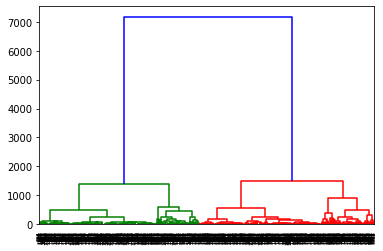

In [7]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

In [8]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(x)
labels = model.labels_

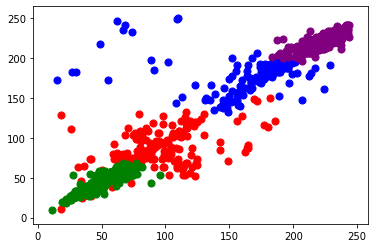

In [9]:
plt.scatter(x[labels==0, 0], x[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(x[labels==1, 0], x[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(x[labels==2, 0], x[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(x[labels==3, 0], x[labels==3, 1], s=50, marker='o', color='purple')
# plt.scatter(x[labels==4, 0], x[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

## 3D圖繪製
#### https://buzzrobot.com/dominant-colors-in-an-image-using-k-means-clustering-3c7af4622036

<IPython.core.display.Javascript object>


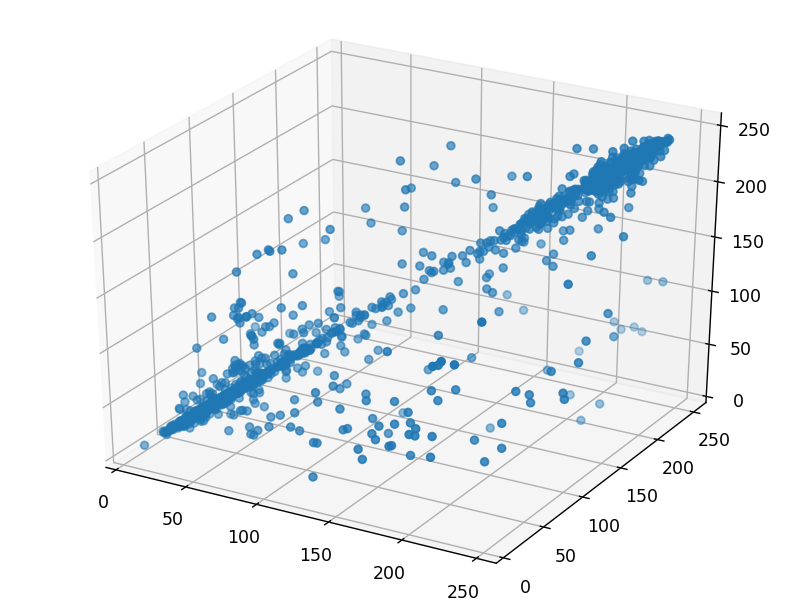

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    

## 讓3d圖可旋轉
%matplotlib notebook

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(rgb_mcolor1, rgb_mcolor2, rgb_mcolor3)

plt.show()

<IPython.core.display.Javascript object>


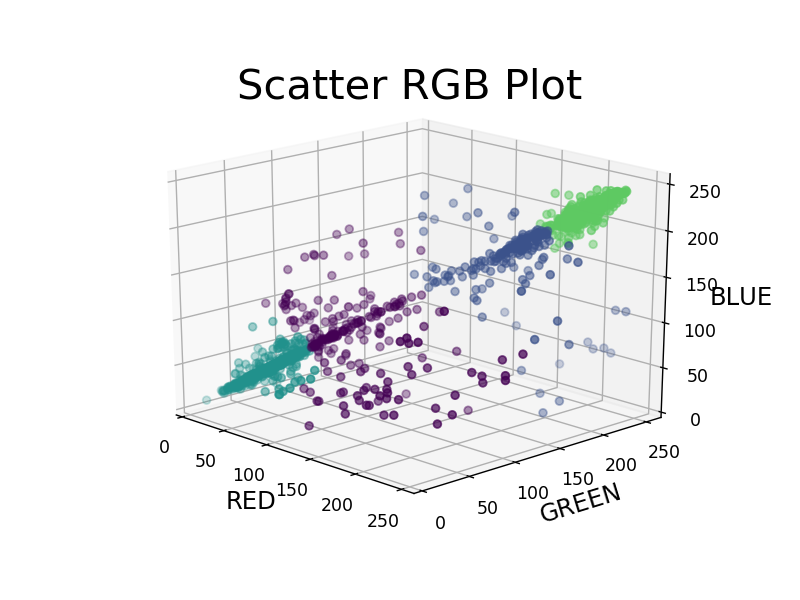

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [13]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## 讓3d圖可旋轉
%matplotlib notebook

# iris = datasets.load_iris()
# data = iris.data[:,0:3]
# x=data[:,0]
# y=data[:,1]
# z=data[:,2]
# kmeans = KMeans(n_clusters=2)
# kmeans = kmeans.fit(x)
# labels = kmeans.predict(x)

# 要分幾群
cluster_num = 4


model = AgglomerativeClustering(n_clusters=cluster_num, affinity='euclidean', linkage='ward')
model = model.fit(x)
labels = model.labels_



fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 設定標題
ax.set_title('Scatter RGB Plot', fontsize=24) 
# 設定三軸名稱
ax.set_xlabel('RED', fontsize=14)
ax.set_ylabel('GREEN', fontsize=14)
ax.set_zlabel('BLUE', fontsize=14)

ColorsA=plt.cm.viridis(np.linspace(0, 1,5),alpha=0.8) #Equally spaced color 
for i in range(cluster_num): #Labels of the clusters 
    xL=[]
    yL=[]
    zL=[]
    for k in range(len(x)):
        if labels[k]==i: #Data points of each cluster 
            xL.append(rgb_mcolor1[k])
            yL.append(rgb_mcolor2[k])
            zL.append(rgb_mcolor3[k])

    ax.scatter(xL,yL,zL,c=ColorsA[i])

## 別人的code

In [25]:
img = []
img1 = []
for i in range(len(rgb_mcolor1)):
    img1.append([rgb_mcolor1[i], rgb_mcolor2[i], rgb_mcolor3[i]])
print(img1)

[[57, 56, 55], [84, 83, 84], [43, 43, 42], [38, 38, 38], [31, 30, 31], [47, 46, 45], [235, 235, 235], [32, 36, 46], [229, 230, 233], [35, 35, 35], [232, 234, 238], [172, 175, 174], [29, 29, 28], [56, 56, 58], [39, 40, 42], [45, 45, 45], [26, 26, 30], [46, 44, 43], [21, 22, 24], [57, 57, 57], [235, 234, 236], [184, 188, 189], [20, 19, 19], [34, 34, 34], [234, 234, 235], [210, 215, 217], [43, 43, 42], [177, 176, 178], [42, 42, 44], [38, 36, 36], [131, 42, 46], [231, 232, 229], [39, 34, 33], [194, 194, 196], [50, 50, 52], [52, 51, 52], [65, 64, 75], [25, 26, 28], [10, 9, 11], [30, 30, 32], [39, 39, 41], [231, 215, 205], [199, 200, 200], [48, 48, 47], [230, 230, 233], [59, 61, 75], [155, 39, 46], [99, 96, 95], [235, 236, 238], [38, 38, 38], [217, 218, 220], [237, 237, 243], [216, 216, 217], [35, 36, 37], [53, 52, 53], [230, 230, 231], [25, 25, 25], [209, 212, 221], [39, 39, 39], [212, 211, 205], [46, 46, 47], [29, 30, 33], [219, 220, 218], [159, 159, 159], [81, 80, 82], [47, 66, 125], [33,

<IPython.core.display.Javascript object>


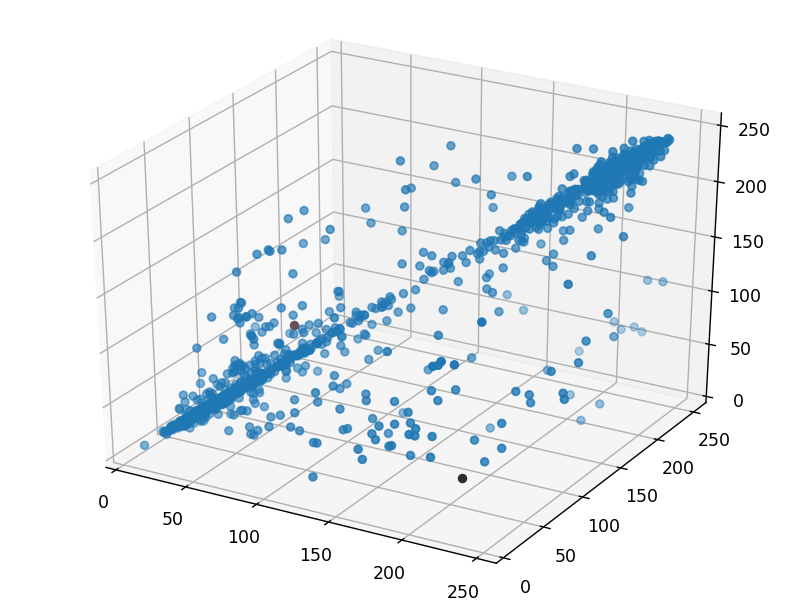

[[ 45.60363636  44.20181818  47.33818182]
 [179.68586387 178.09424084 166.7539267 ]
 [224.29287091 224.48554913 225.75144509]
 [101.39252336  81.97663551  90.60747664]]
[0 3 0 ... 0 2 2]


In [27]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import axes3d    

# ## 讓3d圖可旋轉
# %matplotlib notebook

# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(rgb_mcolor1, rgb_mcolor2, rgb_mcolor3)

# kmeans = KMeans(n_clusters = 4)
# kmeans.fit(img1)

# #getting the colors as per dominance order
# COLORS = kmeans.cluster_centers_
# print(COLORS)
# #save labels
# LABELS = kmeans.labels_
# print(LABELS)
# for label, pix in zip(LABELS, [[210,46,24],[110,23,145]]):
#     ax.scatter(pix[0], pix[1], pix[2], color = '#%02x%02x%02x' % (int(COLORS[label][0]), int(COLORS[label][1]), int(COLORS[label][2])))
# plt.show()

In [14]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    FLAT_IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image
    
    def dominantColors(self):

        img = self.IMAGE
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        #save image after operations
        self.FLAT_IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #getting the colors as per dominance order
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        return self.COLORS.astype(int)
                
    def plotHistogram(self):
       
        #labels form 0 to no. of clusters
        numLabels = np.arange(0, self.CLUSTERS+1)
       
        #create frequency count tables    
        (hist, _) = np.histogram(self.LABELS, bins = numLabels)
        hist = hist.astype("float")
        hist /= hist.sum()
        
        #appending frequencies to cluster centers
        colors = self.COLORS
        
        #descending order sorting as per frequency count
        colors = colors[(-hist).argsort()]
        hist = hist[(-hist).argsort()] 
        
        #creating empty chart
        chart = np.zeros((50, 500, 3), np.uint8)
        start = 0
        
        #creating color rectangles
        for i in range(self.CLUSTERS):
            end = start + hist[i] * 500
            
            #getting rgb values
            r = colors[i][0]
            g = colors[i][1]
            b = colors[i][2]
            
            #using cv2.rectangle to plot colors
            cv2.rectangle(chart, (int(start), 0), (int(end), 50), (r,g,b), -1)
            start = end	
        
        #display chart
        plt.figure()
        plt.axis("off")
        plt.imshow(chart)
        plt.show()
        
    def rgb_to_hex(self, rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
    
    def plotClusters(self):
        #plotting 
        fig = plt.figure()
        ax = Axes3D(fig)        
        for label, pix in zip(self.LABELS, self.FLAT_IMAGE):
            ax.scatter(pix[0], pix[1], pix[2], color = self.rgb_to_hex(self.COLORS[label]))
        plt.show()
        
    def colorPixels(self):
        
        shape = self.IMAGE.shape
        
        img = np.zeros((shape[0] * shape[1], 3))
        labels = self.LABELS

        for i,color in enumerate(self.COLORS):
            
            indices = np.where(labels==i)[0]
            
            for index in indices:
                img[index] = color
        
        img = img.reshape((shape[0], shape[1], 3)).astype(int)
        
        #display img
        plt.figure()
        plt.axis("off")
        plt.imshow(img)
        plt.show()

[[233  33  67]
 [253 236 175]
 [199 191  50]
 [163 210 154]
 [240  99  69]]


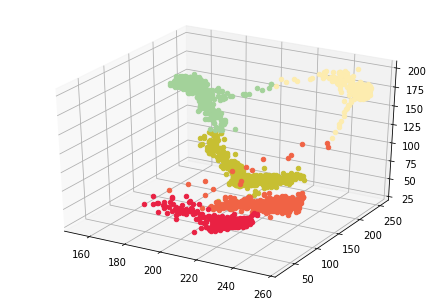

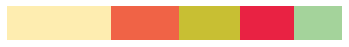

In [3]:
from dominantColors import DominantColors
import cv2

#open image
img = 'colors.jpg'
img = cv2.imread(img)

#convert to RGB from BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# print(img)
#no. of clusters
clusters = 5

#initialize using constructor
dc = DominantColors(img, clusters)

#print dominant colors
colors = dc.dominantColors()
print(colors)

#display clustered points
dc.plotClusters()

#display dominance order
dc.plotHistogram()